In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
Season = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 
#list all 15 seasons being looked at for this project
#2009-2010 equals to 2010 
Type = ['PG', 'OPG','ADV']
#list the different types of data that will be looked at for this project from Basketball Reference
#PG = Per Game Stats
#OPG = Opponent Per Game Stats
#ADV = Advanced Stats

NBA_PG = pd.DataFrame()#empty data frame to store all 15 seasons
NBA_OPG = pd.DataFrame()#empty data frame to store all 15 seasons
NBA_ADV = pd.DataFrame()#empty data frame to store all 15 seasons

#for loop to read in mutiple csv files and combine into one of the single dataframe
for t in Type:
    for s in Season: 
        temp = pd.read_csv('data/NBA_'+str(t)+'_'+ str(s)+ '.csv') #reads in csv file based on Type and Season
        temp['Season'] = s #enters the season as a column since not already labelled
        temp.Team = temp.Team.str.replace("*", "", regex=False) #removes asterisk from team name
        temp['Team'] = temp['Team'].replace({'Charlotte Bobcats': 'Charlotte Hornets', 'New Orleans Hornets': 'New Orleans Pelicans', 'New Jersey Nets': 'Brooklyn Nets'})
        #for consistency purposes some teams were renamed to match its CURRENT team name
        if(t == 'PG'): #helps correctly allocate data into the appropriate dataframe and make changes/edits that only apply to that type of data
            temp = temp.drop(columns=['Rk', 'AST', 'ORB', 'TRB'], axis=1) #removes some columns not being looked at
            temp = temp.rename(columns={'3P':'TP', '3PA':'TPA', '3P%':'TPper'}) 
            #renames column headers for eaier referencing through out the code
            NBA_PG = pd.concat([NBA_PG, temp]) #adds data together into on dataframe
        elif(t == 'OPG'):
            temp = temp.drop(columns=['Rk', 'AST', 'ORB', 'TRB'], axis=1) #removes some columns not being looked at
            temp = temp.rename(columns={'3P':'OTP', '3PA':'OTPA', '3P%':'OTPper'}) 
            #renames column headers for eaier referencing through out the code
            NBA_OPG = pd.concat([NBA_OPG, temp]) #adds data together into on dataframe
        else: #looks at ADV data only
            temp = temp.drop(columns=['Rk','SRS', 'Age', 'SOS', 'ORB%', 'Arena', 'Attend.', 'Attend./G'], axis=1) #removes some columns not being looked at
            temp = temp.rename(columns={'3PAr':'TPAr'}) 
            temp['Win_Per'] = np.round(temp.W / (temp.W + temp.L) *100, 2) #calculates Win Percentage and makes a new column for it
            temp.dropna(how='all', axis=1, inplace=True) #drops/removes N/As or Nulls in the data
            NBA_ADV = pd.concat([NBA_ADV, temp]) #adds data together into on dataframe
        exec(f'NBA_{t}_{s} = temp') #renames each data frame to the appropriate Type and Season so it can be called separately if needed
        #for example if only want to look at the Advanced Stats data for the 2009-2010 AKA 2010 NBA season the  user would just call NBA_ADV_2010
        #same applies for PG and OPG and any season listed i.e. NBA_PG_2014, NBA_PG_2020, etc...

In [3]:
NBA_PG = NBA_PG.set_index(['Season', 'Team']) #sets Season and Team as Hierarchical Index
NBA_OPG = NBA_OPG.set_index(['Season', 'Team']) #sets Season and Team as Hierarchical Index
NBA_ADV = NBA_ADV.set_index(['Season', 'Team']) #sets Season and Team as Hierarchical Index

In [7]:
#finds the mean of all columns based on the Season
NBA_PG_ave = NBA_PG.groupby('Season').mean(numeric_only=True) 
NBA_OPG_ave = NBA_OPG.groupby('Season').mean(numeric_only=True)
NBA_ADV_ave = NBA_ADV.groupby('Season').mean(numeric_only=True)

Text(0.5, 1.0, 'NBA: 3P and 3PA averages per Season')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

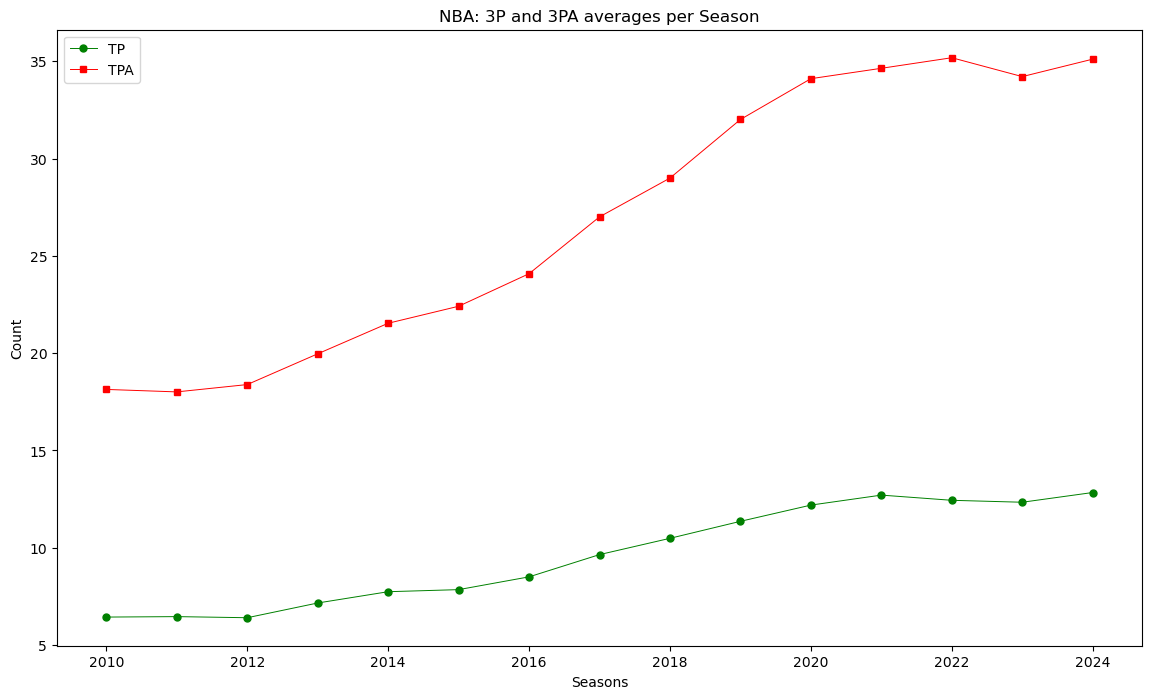

In [9]:
#create figure to visualize change of usage of the 3 point shot through out the years from 2010-2024 
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("NBA: 3P and 3PA averages per Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
ax.plot(NBA_PG_ave.TP, color = 'g', linestyle="-", marker='o', linewidth=0.7, markersize=5, label="TP") 
ax.plot(NBA_PG_ave.TPA, color = 'r', linestyle="-", marker='s', linewidth=0.7, markersize=5, label="TPA")
ax.legend(loc='best')
fig.savefig("NBA 2010-2024 3P and 3PA averages per Season.png")
plt.show()

Text(0.5, 1.0, 'NBA: Defensive Rating averages per Season')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

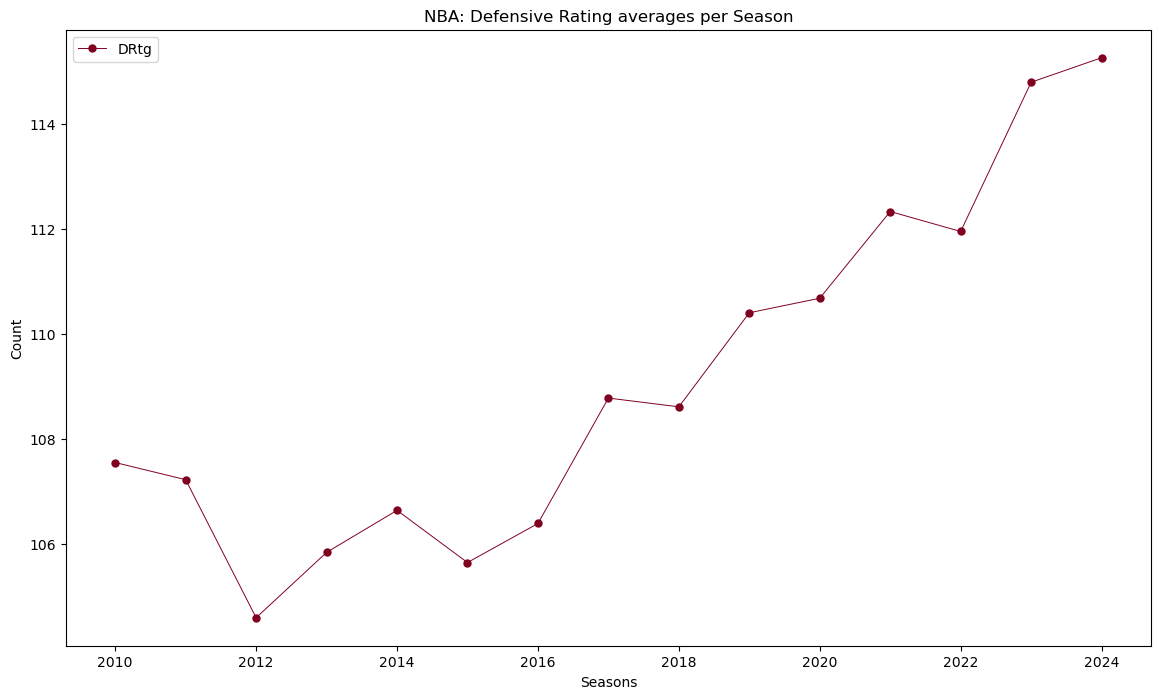

In [615]:
#create figure to visualize change of Defensive Rating through out the years from 2010-2024 
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("NBA: Defensive Rating averages per Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
ax.plot(NBA_ADV_ave.DRtg, color = '#800020', linestyle="-", marker='o', linewidth=0.7, markersize=5, label="DRtg")
#ax.plot(NBA_ADV_ave.ORtg, color = '#00008b', linestyle="-", marker='s', linewidth=0.7, markersize=5, label="ORtg")
#ax.plot(NBA_ADV_ave.NRtg, color = '#013220', linestyle="-", marker='H', linewidth=0.7, markersize=5, label="NRtg")
ax.legend(loc='best')
fig.savefig("NBA 2010-2024 Defensive Rating averages per Season.png")
plt.show()

Text(0.5, 1.0, 'NBA: Defensive and Offensive Rating averages per Season')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

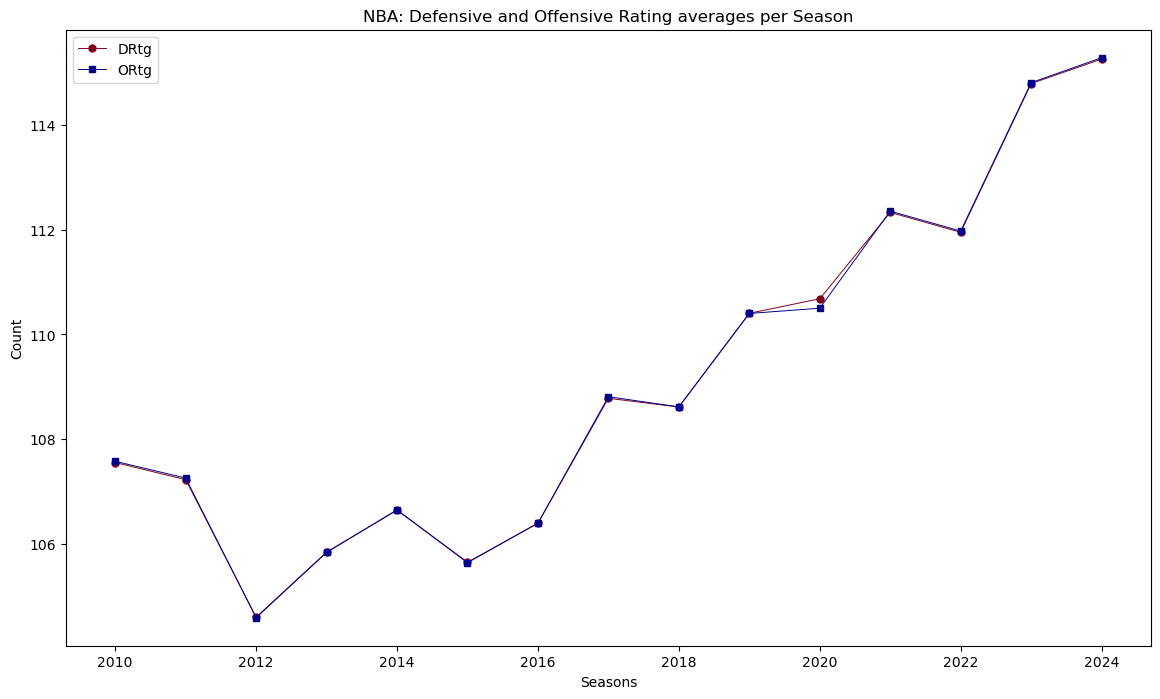

In [11]:
#create figure to visualize change of Defensive Rating through out the years from 2010-2024 
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("NBA: Defensive and Offensive Rating averages per Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
ax.plot(NBA_ADV_ave.DRtg, color = '#800020', linestyle="-", marker='o', linewidth=0.7, markersize=5, label="DRtg")
ax.plot(NBA_ADV_ave.ORtg, color = '#00008b', linestyle="-", marker='s', linewidth=0.7, markersize=5, label="ORtg")
#ax.plot(NBA_ADV_ave.NRtg, color = '#013220', linestyle="-", marker='H', linewidth=0.7, markersize=5, label="NRtg")
ax.legend(loc='best')
fig.savefig("NBA 2010-2024 Defensive and Offensive averages per Season.png")
plt.show()

Text(0.5, 1.0, 'NBA: Net Rating averages per Season')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

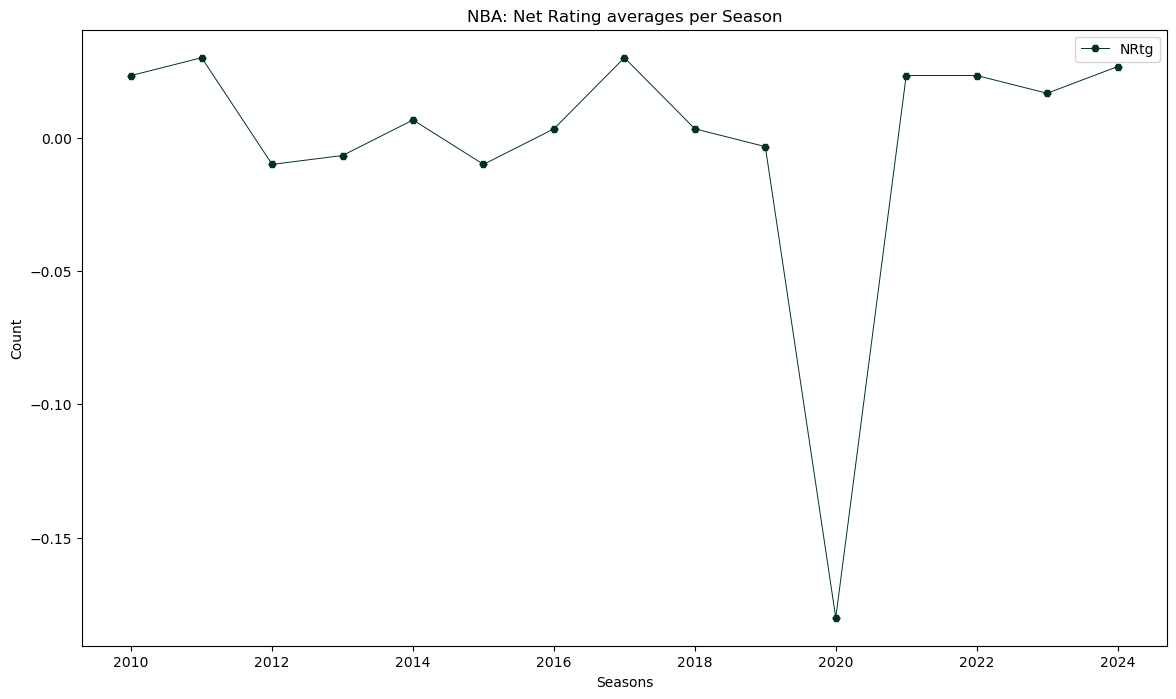

In [619]:
#create figure to visualize change of Defensive Rating through out the years from 2010-2024 
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("NBA: Net Rating averages per Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
#ax.plot(NBA_ADV_ave.DRtg, color = '#800020', linestyle="-", marker='o', linewidth=0.7, markersize=5, label="DRtg")
#ax.plot(NBA_ADV_ave.ORtg, color = '#00008b', linestyle="-", marker='s', linewidth=0.7, markersize=5, label="ORtg")
ax.plot(NBA_ADV_ave.NRtg, color = '#013220', linestyle="-", marker='H', linewidth=0.7, markersize=5, label="NRtg")
fig.savefig("NBA 2010-2024 Net Rating averages per Season.png")
ax.legend(loc='best')
plt.show()

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

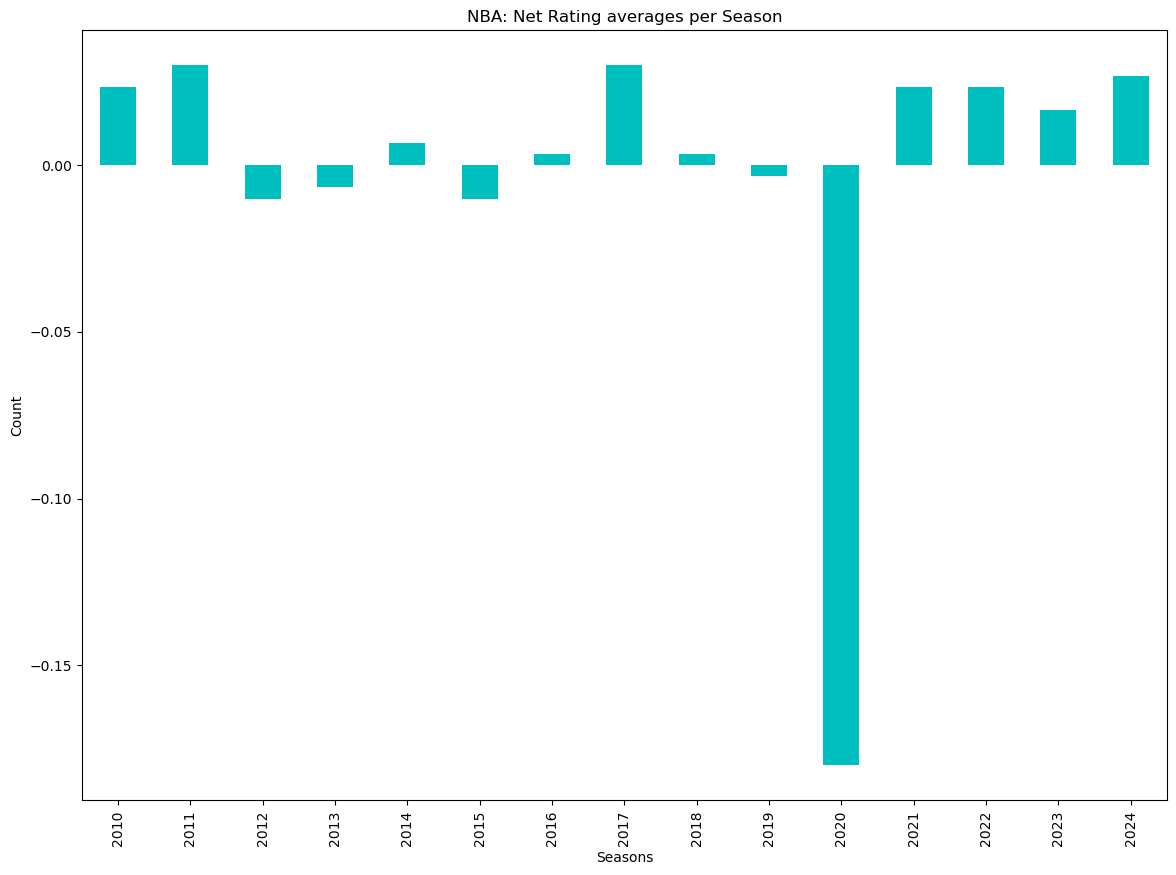

In [13]:
NBA_NRtg_BP = NBA_ADV_ave['NRtg'].plot.bar(figsize=(14,10),title = "NBA: Net Rating averages per Season", color = "c") 
NBA_NRtg_BP.set_xlabel("Seasons")
NBA_NRtg_BP.set_ylabel("Count")
fig = NBA_NRtg_BP.get_figure() 
fig.savefig("NBA 2010-2024 Net Rating averages per Season_Bar.png")
plt.show() #displays plot

Text(0.5, 1.0, 'NBA: DRB, STL, and BLK averages per Season')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Count')

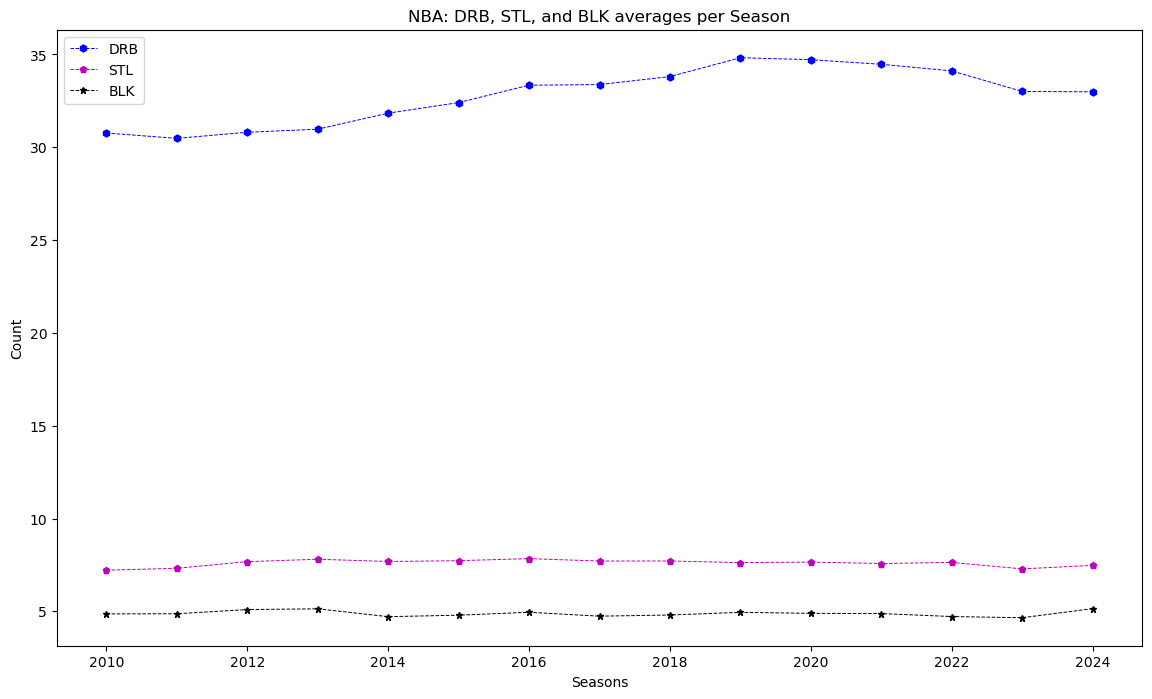

In [15]:
#create figure to visualize change of usage of defensive rebounds, steals and blocks through out the years from 2010-2024 
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("NBA: DRB, STL, and BLK averages per Season")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
ax.plot(NBA_PG_ave.DRB, color = 'b', linestyle="--", marker='h', linewidth=0.7, markersize=5, label="DRB")
ax.plot(NBA_PG_ave.STL, color = 'm', linestyle="--", marker='p', linewidth=0.7, markersize=5, label="STL")
ax.plot(NBA_PG_ave.BLK, color = 'k', linestyle="--", marker='*', linewidth=0.7, markersize=5, label="BLK")
ax.legend(loc='best')
fig.savefig("NBA 2010-2024 Net Rating averages per Season.png")
plt.show()

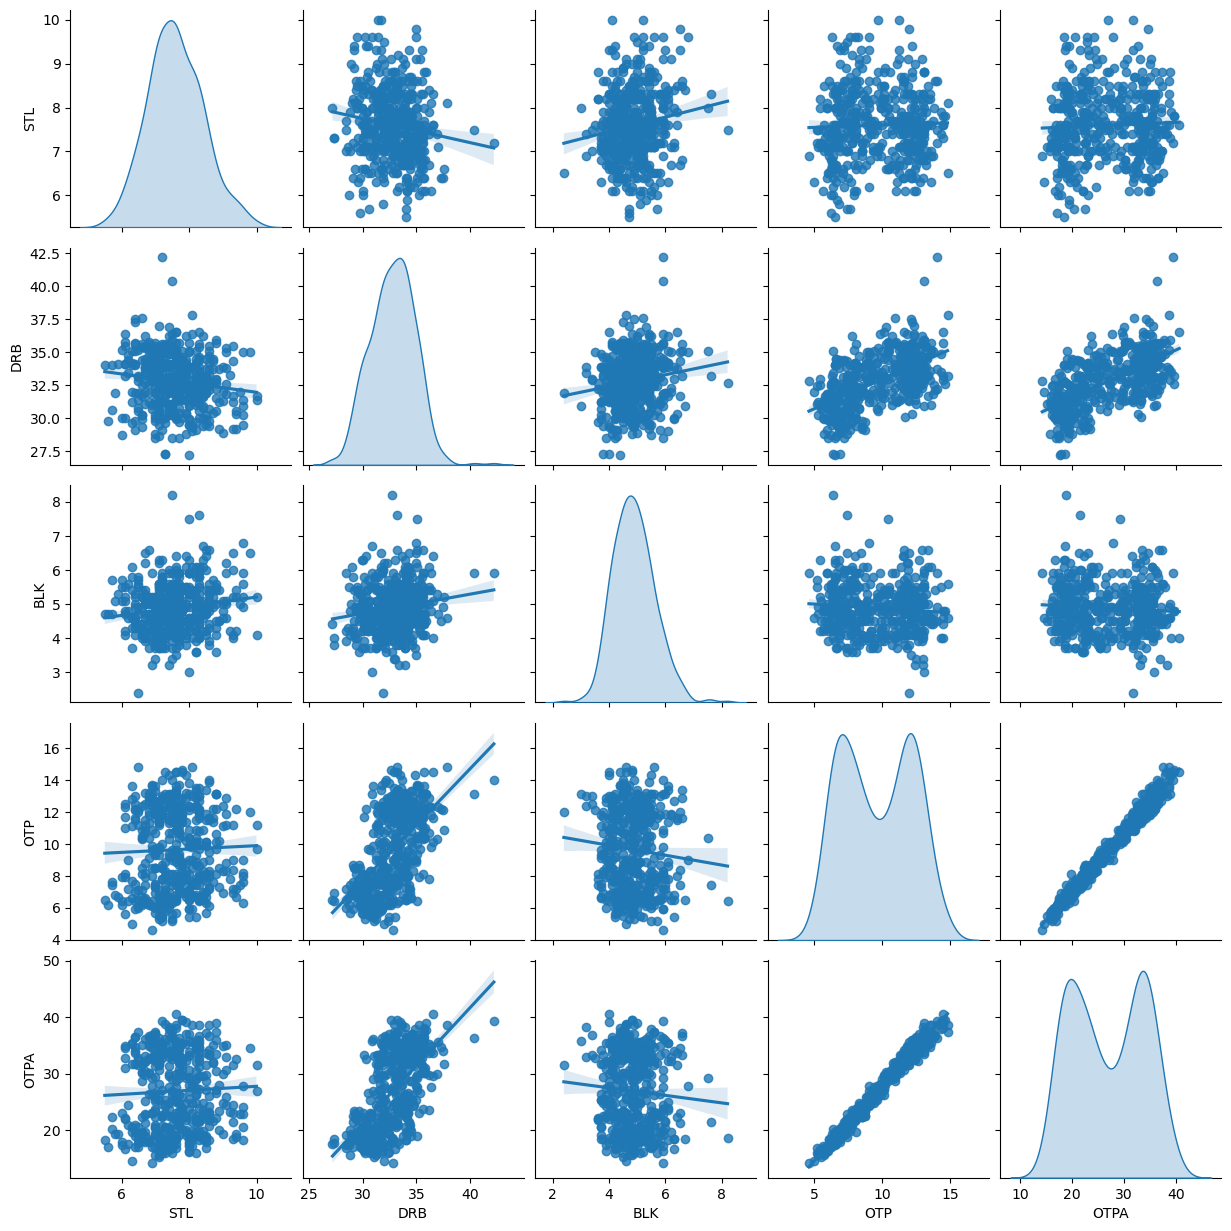

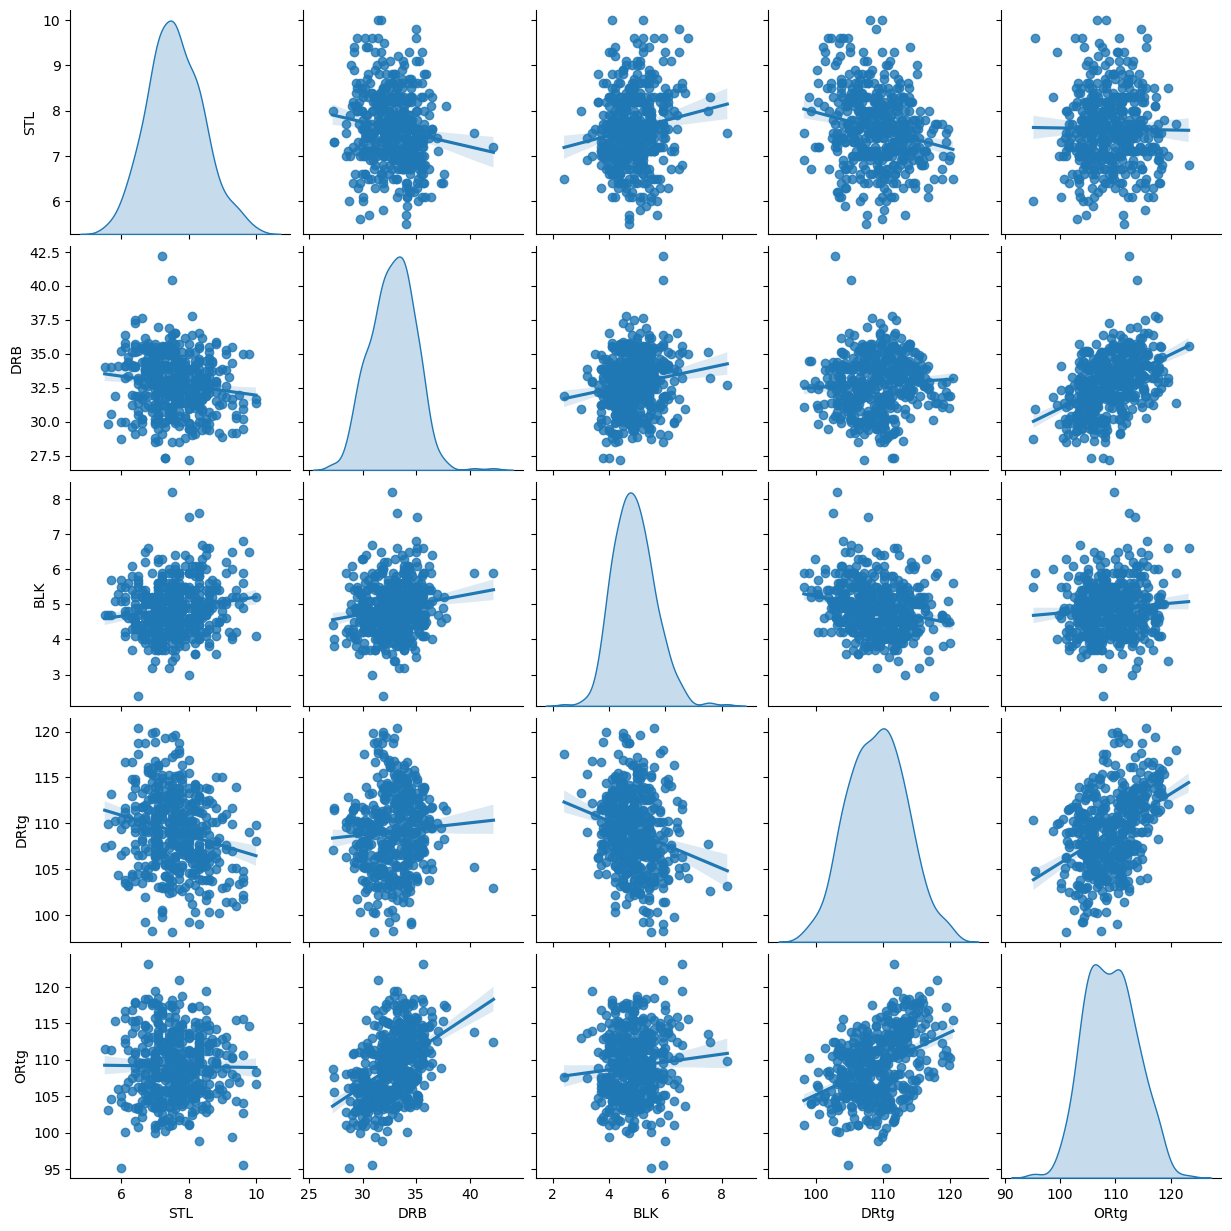

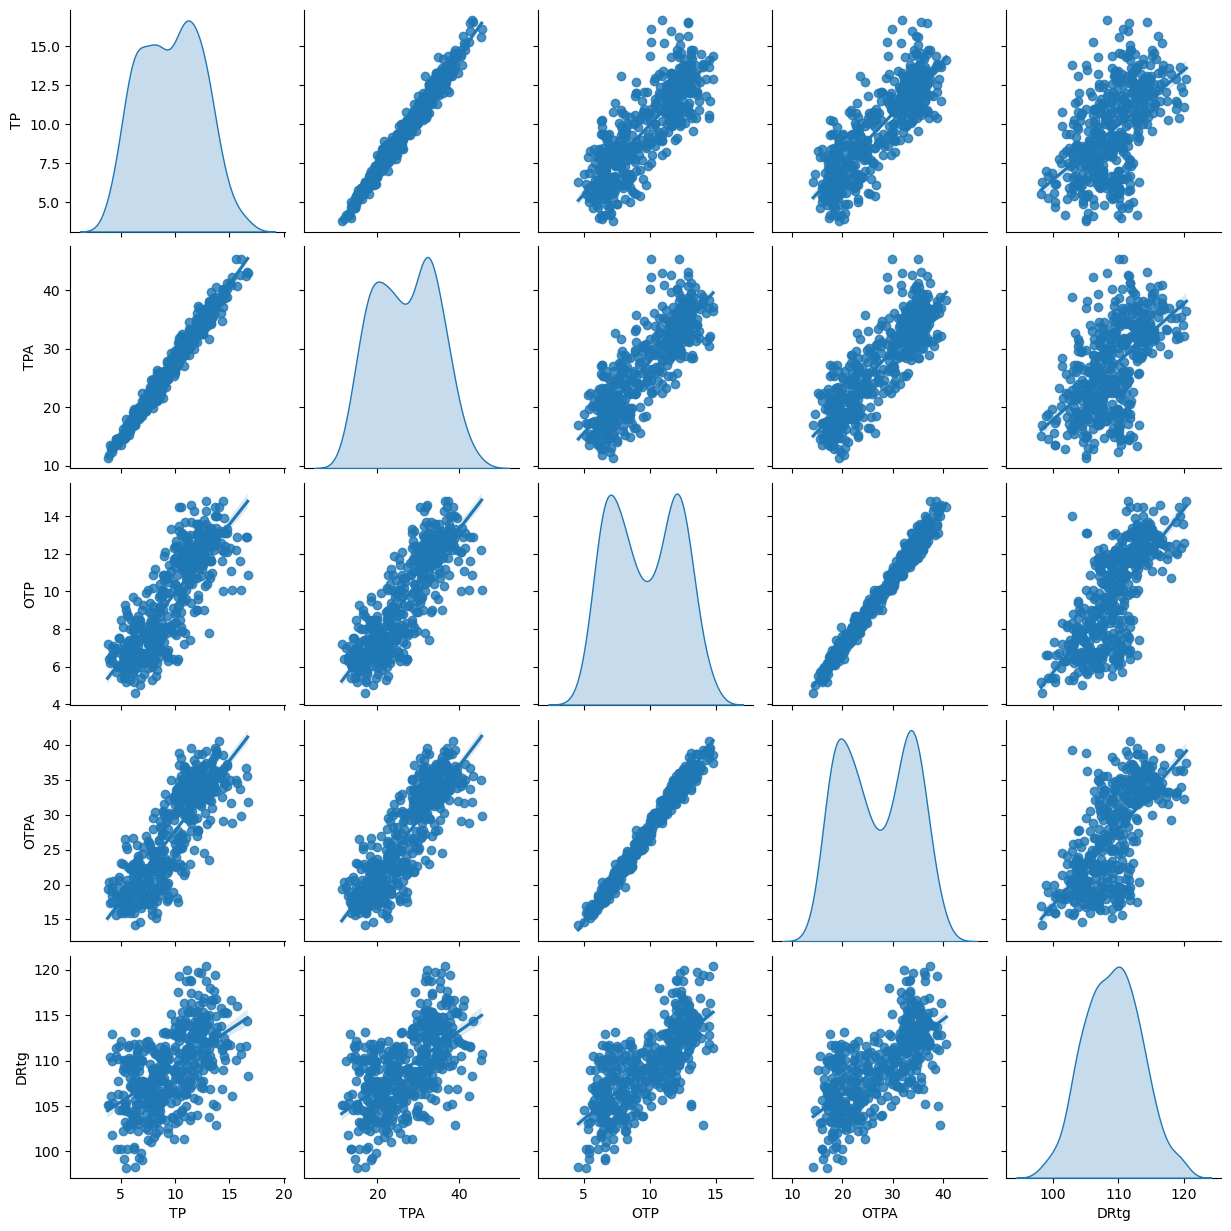

In [17]:
NBA_PG_Def = pd.DataFrame(NBA_PG[['STL','DRB', 'BLK','TP','TPA']])
NBA_OPG_Off = pd.DataFrame(NBA_OPG[['OTP','OTPA']])
NBA_ADV_Def = pd.DataFrame(NBA_ADV[['DRtg', 'ORtg','Win_Per']])
NBA_ODcorr = pd.merge(NBA_PG_Def, NBA_OPG_Off, on = ["Team", "Season"], how = "left")
NBA_ODcorr = pd.merge(NBA_ODcorr, NBA_ADV_Def, on = ["Team", "Season"], how = "left")
sns.pairplot(NBA_ODcorr[['STL','DRB', 'BLK','OTP','OTPA']], diag_kind='kde', kind='reg').savefig("NBA 2010-2024 Scatter Matrix_1.png")
sns.pairplot(NBA_ODcorr[['STL','DRB', 'BLK','DRtg', 'ORtg']], diag_kind='kde', kind='reg').savefig("NBA 2010-2024 Scatter Matrix_2.png")
sns.pairplot(NBA_ODcorr[['TP','TPA', 'OTP', 'OTPA','DRtg']], diag_kind='kde', kind='reg').savefig("NBA 2010-2024 Scatter Matrix_3.png")
plt.show()

In [18]:
NBA_ODcorr[['STL','DRB', 'BLK','OTP','OTPA']].corr()
NBA_ODcorr[['STL','DRB', 'BLK','DRtg', 'ORtg']].corr()
NBA_ODcorr[['TP','TPA', 'OTP', 'OTPA','DRtg']].corr()
NBA_ODcorr.corr()

,STL,DRB,BLK,OTP,OTPA
STL,1.000000,-0.138406,0.149093,0.033300,0.042319
DRB,-0.138406,1.000000,0.158571,0.562782,0.611220
BLK,0.149093,0.158571,1.000000,-0.088626,-0.071216
OTP,0.033300,0.562782,-0.088626,1.000000,0.989969
OTPA,0.042319,0.611220,-0.071216,0.989969,1.000000


,STL,DRB,BLK,DRtg,ORtg
STL,1.000000,-0.138406,0.149093,-0.210314,-0.012396
DRB,-0.138406,1.000000,0.158571,0.062565,0.440909
BLK,0.149093,0.158571,1.000000,-0.222483,0.086479
DRtg,-0.210314,0.062565,-0.222483,1.000000,0.403242
ORtg,-0.012396,0.440909,0.086479,0.403242,1.000000


,TP,TPA,OTP,OTPA,DRtg
TP,1.000000,0.986854,0.809190,0.829608,0.528733
TPA,0.986854,1.000000,0.832620,0.849846,0.561849
OTP,0.809190,0.832620,1.000000,0.989969,0.723989
OTPA,0.829608,0.849846,0.989969,1.000000,0.670939
DRtg,0.528733,0.561849,0.723989,0.670939,1.000000


,STL,DRB,BLK,TP,TPA,OTP,OTPA,DRtg,ORtg,Win_Per
STL,1.000000,-0.138406,0.149093,-0.015604,-0.003483,0.033300,0.042319,-0.210314,-0.012396,0.160637
DRB,-0.138406,1.000000,0.158571,0.621674,0.614240,0.562782,0.611220,0.062565,0.440909,0.347359
BLK,0.149093,0.158571,1.000000,-0.040558,-0.056627,-0.088626,-0.071216,-0.222483,0.086479,0.260217
TP,-0.015604,0.621674,-0.040558,1.000000,0.986854,0.809190,0.829608,0.528733,0.720388,0.196660
TPA,-0.003483,0.614240,-0.056627,0.986854,1.000000,0.832620,0.849846,0.561849,0.657928,0.108613
OTP,0.033300,0.562782,-0.088626,0.809190,0.832620,1.000000,0.989969,0.723989,0.574386,-0.091013
OTPA,0.042319,0.611220,-0.071216,0.829608,0.849846,0.989969,1.000000,0.670939,0.598415,-0.022476
DRtg,-0.210314,0.062565,-0.222483,0.528733,0.561849,0.723989,0.670939,1.000000,0.403242,-0.487809
ORtg,-0.012396,0.440909,0.086479,0.720388,0.657928,0.574386,0.598415,0.403242,1.000000,0.566557
Win_Per,0.160637,0.347359,0.260217,0.196660,0.108613,-0.091013,-0.022476,-0.487809,0.566557,1.000000
